In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("cars.csv", delimiter=';', header=0)
df.info

<bound method DataFrame.info of                            Car     MPG Cylinders Displacement Horsepower  \
0                       STRING  DOUBLE       INT       DOUBLE     DOUBLE   
1    Chevrolet Chevelle Malibu    18.0         8        307.0      130.0   
2            Buick Skylark 320    15.0         8        350.0      165.0   
3           Plymouth Satellite    18.0         8        318.0      150.0   
4                AMC Rebel SST    16.0         8        304.0      150.0   
..                         ...     ...       ...          ...        ...   
402            Ford Mustang GL    27.0         4        140.0      86.00   
403          Volkswagen Pickup    44.0         4        97.00      52.00   
404              Dodge Rampage    32.0         4        135.0      84.00   
405                Ford Ranger    28.0         4        120.0      79.00   
406                 Chevy S-10    31.0         4        119.0      82.00   

     Weight Acceleration Model  Origin  
0    DOUBLE   

In [4]:
datatype_row = df.iloc[0]
df = df.drop(0).reset_index(drop=True)
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


In [5]:
datatype_mapping = {
    'STRING': 'string',
    'DOUBLE': 'float64',
    'INT': 'int',  
    'CAT': 'category'
}
for col, datatype in datatype_row.items():
    df[col] = df[col].astype(datatype_mapping[datatype])

In [6]:
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US


### EDA

In [7]:
df.isna().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

In [8]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


- While inspecting the data I found out that there are 0's in the columns MPG and Horsepower which are erroneous, assuming these fields are representing attributes of a vehicle. So, I am visualizing the distributions of these two fields and based on the skewness I will be imputing these values based on mean or median

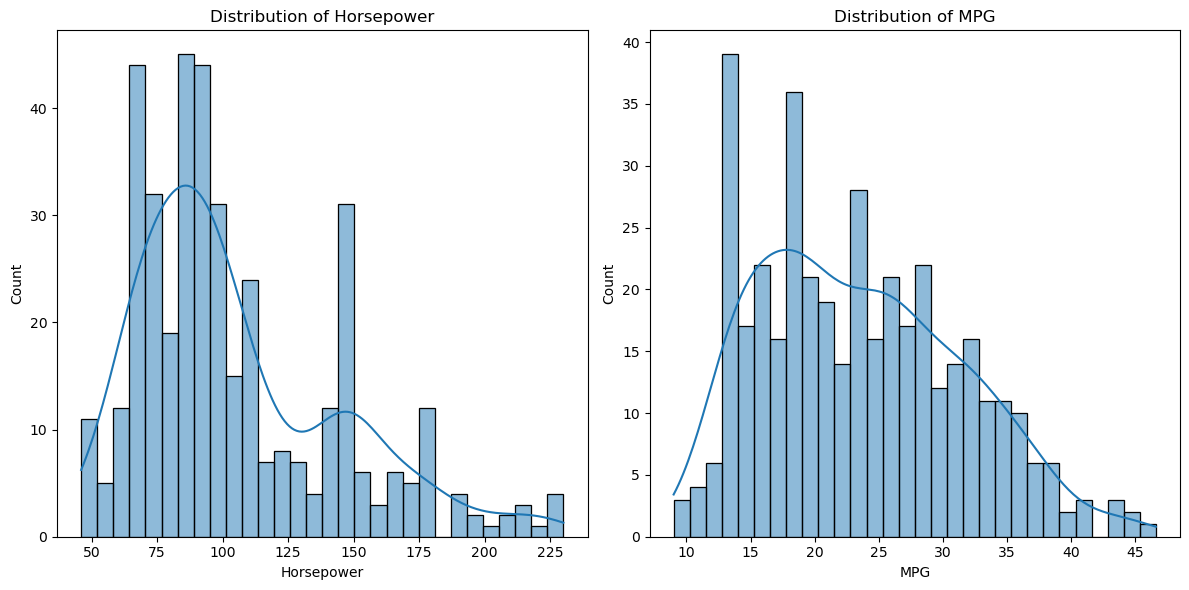

In [9]:
import warnings

warnings.filterwarnings("ignore")

data_viz = df.copy()
data_viz['Horsepower'] = data_viz['Horsepower'].replace(0, np.NaN)
data_viz['MPG'] = data_viz['MPG'].replace(0, np.NaN)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_viz['Horsepower'], kde=True, bins=30)
plt.title('Distribution of Horsepower')

plt.subplot(1, 2, 2)
sns.histplot(data_viz['MPG'], kde=True, bins=30)
plt.title('Distribution of MPG')

plt.tight_layout()
plt.show()

- It is evident that the distributions are skewed. Hence I am imputing the values with median

In [10]:
horsepower_median_value = df['Horsepower'].replace(0, np.NaN).median()
mpg_median_value = df['MPG'].replace(0, np.NaN).median()

df['Horsepower'] = df['Horsepower'].replace(0, horsepower_median_value)
df['MPG'] = df['MPG'].replace(0, mpg_median_value)

In [11]:
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US


In [12]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.504433,5.475369,194.779557,104.933498,2979.413793,15.519704,75.921182
std,7.738736,1.712160,104.922458,38.499806,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [13]:
df["Cylinders"].value_counts()

Cylinders
4    207
8    108
6     84
3      4
5      3
Name: count, dtype: int64

In [14]:
df["CarBrand"] = df["Car"].str.split(' ').str[0]

In [15]:
df["CarBrand"].unique()

array(['Chevrolet', 'Buick', 'Plymouth', 'AMC', 'Ford', 'Pontiac',
       'Citroen', 'Dodge', 'Toyota', 'Datsun', 'Volkswagen', 'Peugeot',
       'Audi', 'Saab', 'BMW', 'Chevy', 'Hi', 'Mercury', 'Opel', 'Fiat',
       'Oldsmobile', 'Chrysler', 'Mazda', 'Volvo', 'Renault', 'Honda',
       'Subaru', 'Chevrolete', 'Capri', 'Mercedes-Benz', 'Cadillac',
       'Mercedes', 'Triumph', 'Nissan'], dtype=object)

- Upon review of the provided data, it has been observed that the entry labeled 'Hi' appears to be irrelevant to the context of car brands. Additionally, there are inconsistencies with the representation of the Chevrolet brand, where it is misspelled as 'Chevrolete' and also abbreviated as 'Chevy'.

- Also, Mercedes-Benz and Mercedes are single entity. Hence, I am standardizing the observations based on the assumptions below:

 - Chevrolete,Chevy -> Chevrolet
 -  Mercedes-Benz -> Mercedes 
 -  Hi -> To be removed 

In [16]:
standard_brand_dict = {
    "Chevrolete": "Chevrolet",
    "Chevy": "Chevrolet",
    "Mercedes-Benz": "Mercedes"
}

In [17]:
df["CarBrand"] = df["CarBrand"].replace(standard_brand_dict)

In [18]:
df["CarBrand"].unique()

array(['Chevrolet', 'Buick', 'Plymouth', 'AMC', 'Ford', 'Pontiac',
       'Citroen', 'Dodge', 'Toyota', 'Datsun', 'Volkswagen', 'Peugeot',
       'Audi', 'Saab', 'BMW', 'Hi', 'Mercury', 'Opel', 'Fiat',
       'Oldsmobile', 'Chrysler', 'Mazda', 'Volvo', 'Renault', 'Honda',
       'Subaru', 'Capri', 'Mercedes', 'Cadillac', 'Triumph', 'Nissan'],
      dtype=object)

In [19]:
df = df.drop(df[df['CarBrand'] == "Hi"].index)

In [20]:
df["CarBrand"].unique()

array(['Chevrolet', 'Buick', 'Plymouth', 'AMC', 'Ford', 'Pontiac',
       'Citroen', 'Dodge', 'Toyota', 'Datsun', 'Volkswagen', 'Peugeot',
       'Audi', 'Saab', 'BMW', 'Mercury', 'Opel', 'Fiat', 'Oldsmobile',
       'Chrysler', 'Mazda', 'Volvo', 'Renault', 'Honda', 'Subaru',
       'Capri', 'Mercedes', 'Cadillac', 'Triumph', 'Nissan'], dtype=object)

In [21]:
df = df.drop(df[df['CarBrand'] == "Hi"].index)

In [22]:
df.to_csv("test_data.csv")

In [23]:
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,CarBrand
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,Chevrolet
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,Buick
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,Plymouth
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,AMC
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,Ford
...,...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US,Ford
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,Volkswagen
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US,Dodge
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US,Ford


## Find the Car with Highest MPG

In [24]:
car_with_highest_mileage = df.loc[df['MPG'].idxmax()]

car_with_highest_mileage

Car             Mazda GLC
MPG                  46.6
Cylinders               4
Displacement         86.0
Horsepower           65.0
Weight             2110.0
Acceleration         17.9
Model                  80
Origin              Japan
CarBrand            Mazda
Name: 329, dtype: object

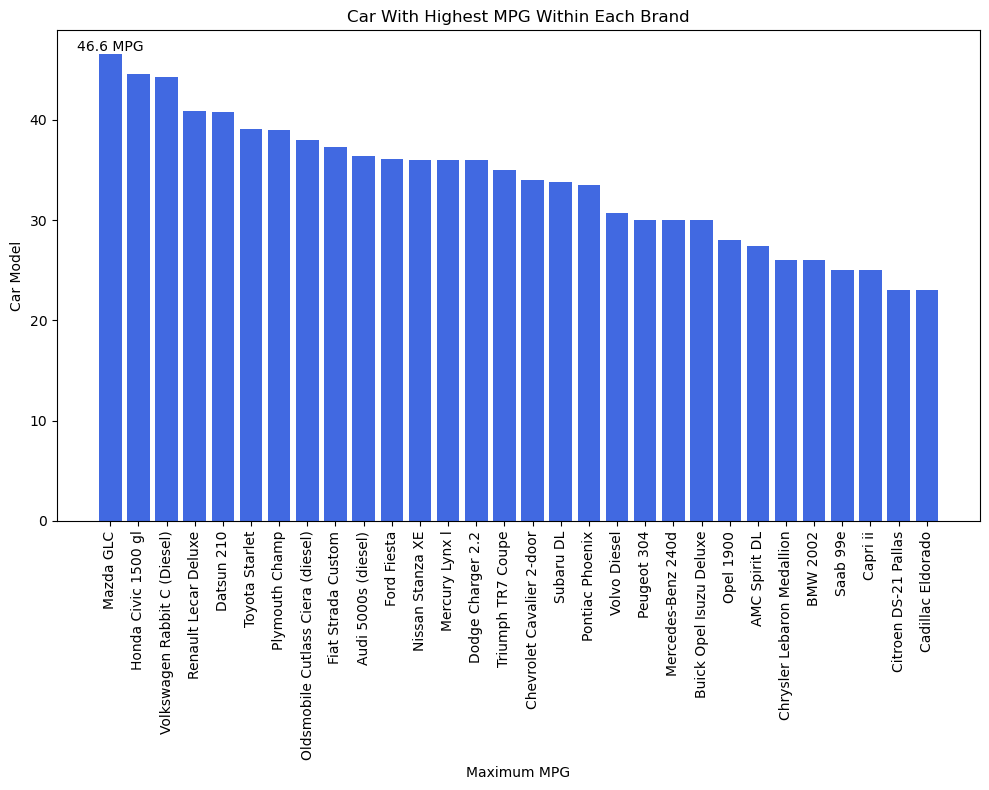

In [25]:
import matplotlib.pyplot as plt

def get_car_with_max_mpg(group):
    return group.loc[group['MPG'].idxmax()]

max_mpg_cars_by_brand = df.groupby('CarBrand').apply(get_car_with_max_mpg)[['Car', 'MPG']].sort_values(by='MPG', ascending=False)
max_mpg_cars_by_brand.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 8))
bars = plt.bar(max_mpg_cars_by_brand['Car'], max_mpg_cars_by_brand['MPG'], color='royalblue')
plt.xlabel('Maximum MPG')
plt.ylabel('Car Model')
plt.title('Car With Highest MPG Within Each Brand')
plt.xticks(rotation=90)
plt.text(bars[0].get_x() + bars[0].get_width() / 2.0, bars[0].get_height(), f'{bars[0].get_height()} MPG', ha='center', va='bottom')
plt.tight_layout()
plt.show()


## Average MPG Per Cylinder Count

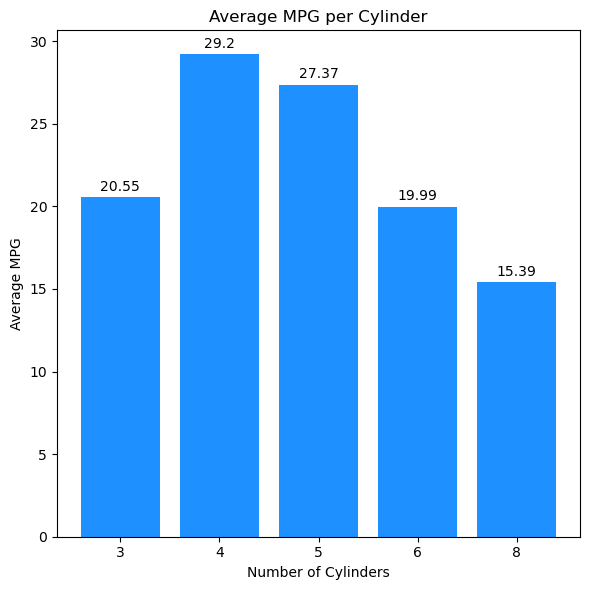

In [26]:
# Calculation of the average MPG for each cylinder count
average_mpg_per_cylinder = df.groupby('Cylinders')['MPG'].mean().reset_index()

plt.figure(figsize=(6, 6))
bars = plt.bar(average_mpg_per_cylinder['Cylinders'].astype(str), average_mpg_per_cylinder['MPG'], color='dodgerblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.title('Average MPG per Cylinder')
plt.tight_layout()
plt.show()

## Find each Make's Average MPG

In [28]:
average_mpg_by_make = df.groupby('CarBrand')['MPG'].mean().reset_index()

print(average_mpg_by_make)

      CarBrand        MPG
0          AMC  18.410345
1         Audi  26.714286
2          BMW  23.750000
3        Buick  19.182353
4     Cadillac  19.750000
5        Capri  25.000000
6    Chevrolet  20.277083
7     Chrysler  17.266667
8      Citroen  23.000000
9       Datsun  31.113043
10       Dodge  22.060714
11        Fiat  28.912500
12        Ford  19.818868
13       Honda  33.761538
14       Mazda  30.058333
15    Mercedes  23.966667
16     Mercury  19.118182
17      Nissan  36.000000
18  Oldsmobile  21.100000
19        Opel  25.750000
20     Peugeot  23.687500
21    Plymouth  21.743750
22     Pontiac  20.012500
23     Renault  32.880000
24        Saab  23.720000
25      Subaru  30.525000
26      Toyota  28.165385
27     Triumph  35.000000
28  Volkswagen  31.456522
29       Volvo  21.116667


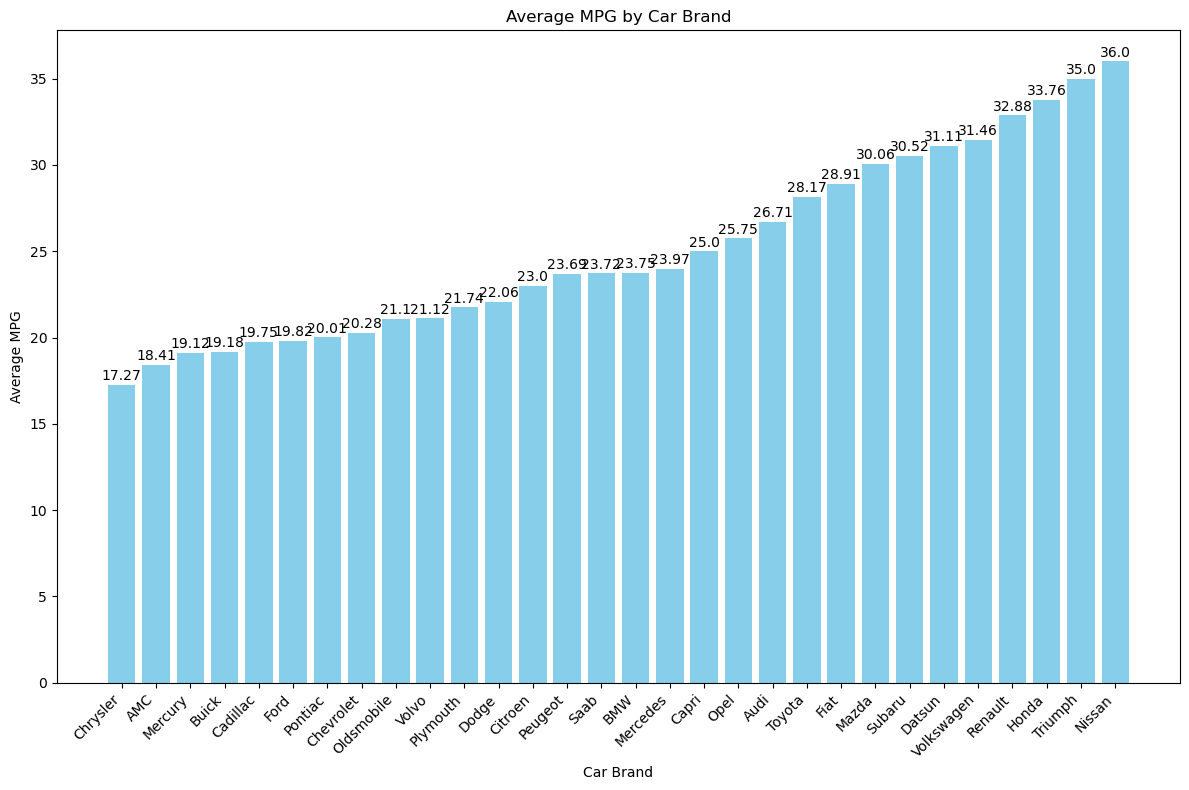

In [29]:


average_mpg_by_make = average_mpg_by_make.sort_values('MPG', ascending=True)

plt.figure(figsize=(12, 8))  # Increased figure size for better clarity
bars = plt.bar(average_mpg_by_make['CarBrand'], average_mpg_by_make['MPG'], color='skyblue')  # Using a different color
plt.xlabel('Car Brand')
plt.ylabel('Average MPG')
plt.title('Average MPG by Car Brand')
plt.xticks(rotation=45, ha='right')  
plt.yticks()  

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()



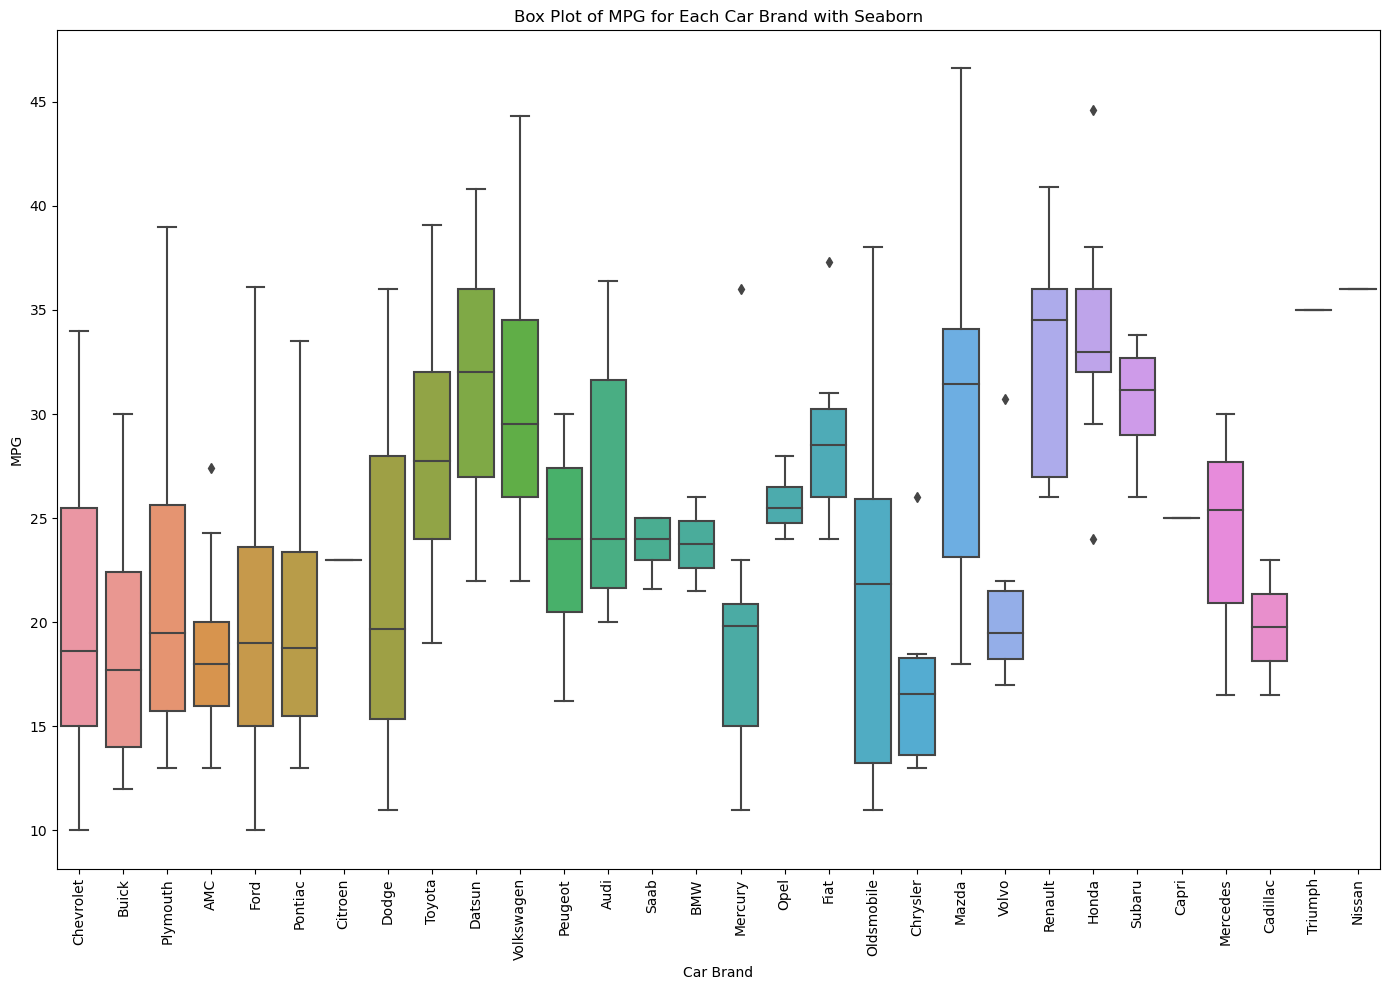

In [30]:
plt.figure(figsize=(14, 10))

# Creating a box plot for MPG across different CarBrands using Seaborn
sns.boxplot(x='CarBrand', y='MPG', data=df)

plt.xticks(rotation=90)  # Rotate labels for better legibility
plt.title('Box Plot of MPG for Each Car Brand with Seaborn')
plt.xlabel('Car Brand')
plt.ylabel('MPG')
plt.tight_layout()
plt.show()


# Model to predict the MPG based on other data

In [32]:
data = df.copy()

Feature engineering: Creating two new features called Displacement_per_cylinder and weight_to_horsepower to capture more relationships in the data

In [33]:
data["Displacement_per_cylinder"]= data['Displacement'] / data['Cylinders']
data['Wt-hp_rtio'] = data['Weight'] / data['Horsepower']

In [34]:
data

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,CarBrand,Displacement_per_cylinder,Wt-hp_rtio
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,Chevrolet,38.375,26.953846
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,Buick,43.750,22.381818
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,Plymouth,39.750,22.906667
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,AMC,38.000,22.886667
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,Ford,37.750,24.635714
...,...,...,...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US,Ford,35.000,32.441860
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,Volkswagen,24.250,40.961538
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US,Dodge,33.750,27.321429
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US,Ford,30.000,33.227848


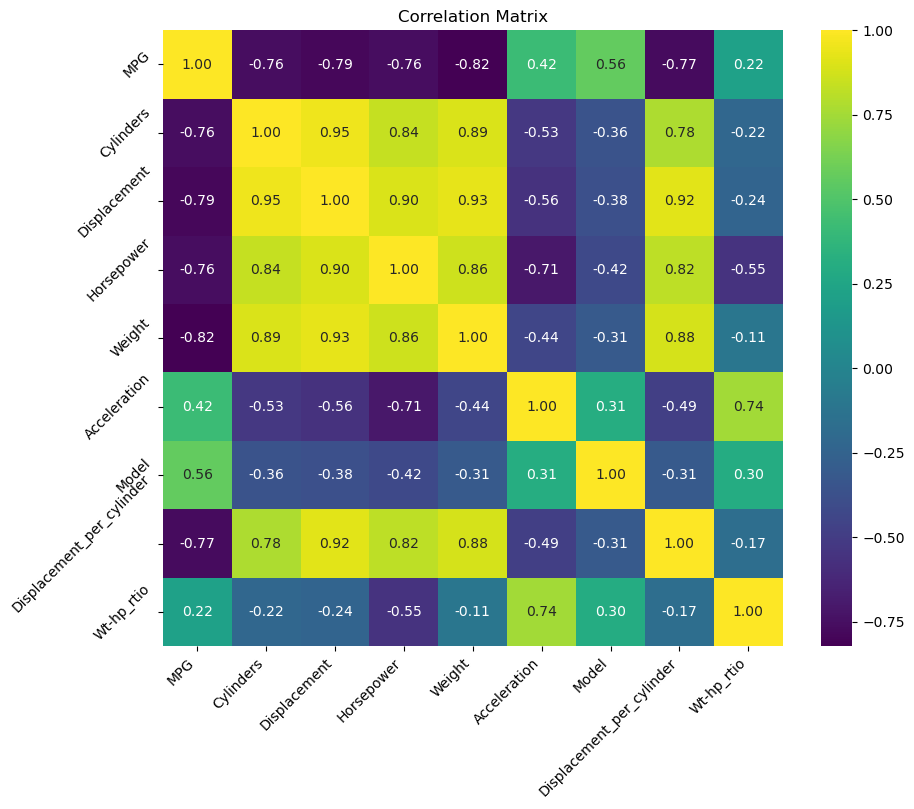

In [35]:
corr_matrix = data.corr(method='pearson', numeric_only= True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)



plt.title('Correlation Matrix')

plt.show()

After analyzing the correlation heatmap, the 'Cylinders' and 'Displacement' features will be removed since they are highly correlated with each other. Additionally, the 'Car' feature, being a unique identifier, will be dropped as it is not expected to aid in predicting the target variable.

In [36]:
data = data.drop(['Cylinders', 'Displacement','Car'], axis=1)

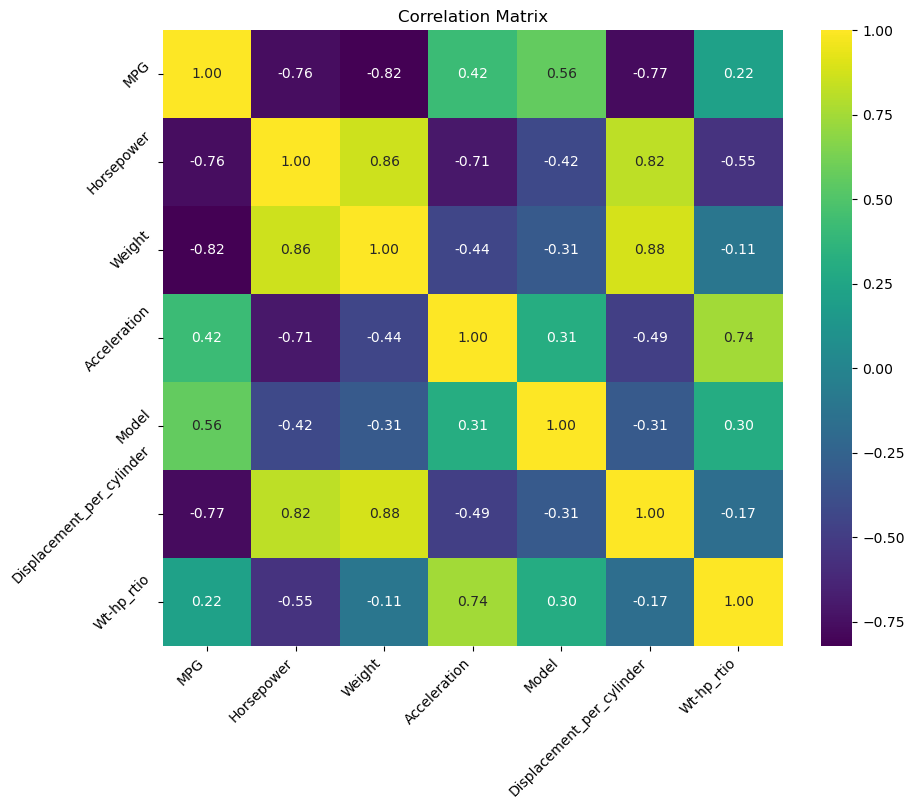

In [37]:
corr_matrix = data.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)



plt.title('Correlation Matrix')

plt.show()

Now that we have 2 categorical features CarBrand and Origin, a column transformer is required to:

Scale the numerical columns using StandardScalar
Encode the Categorical columns using One hot encoding

In [38]:
categorical_cols = ['Origin', 'CarBrand'] #categorical columns 
numerical_cols = ['Wt-hp_rtio','Displacement_per_cylinder', 'Horsepower', 'Weight', 'Acceleration','Model'] #Numerical Columns 

In [39]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore') #Defining the OneHotEncoder to transform categorical variables  

numerical_transformer = StandardScaler() ##Defining the StandardScaler to transform numerical variables  

# Preprocessor pipeline for both categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

In [40]:
X = preprocessor.fit_transform(data[categorical_cols + numerical_cols]) #Train
y = data['MPG'] #Test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Since we are predicting a continous variable, this is a regression problem. Hence we are using Linear regression and Random forest regression model.
Metrics that are used are: 

- MSE
- RMSE
- R2


In [42]:
linear_model = LinearRegression() #Initialize linear model
linear_model.fit(X_train, y_train) 

y_test_pred = linear_model.predict(X_test)

#Printing the results
linear_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE - Linear: {linear_mse}')

linear_rmse = np.sqrt(linear_mse)
print(f'Test RMSE - Linear: {linear_rmse}')

linear_r2 = r2_score(y_test, y_test_pred)
print(f'R-squared value - Linear: {linear_r2}')




Test MSE - Linear: 14.753668058692048
Test RMSE - Linear: 3.8410503848155972
R-squared value - Linear: 0.7819610765734166


In [43]:
rf_model = RandomForestRegressor() #Initialize Random Forest model
rf_model.fit(X_train, y_train)


y_test_pred_rf = rf_model.predict(X_test)

#Printing the results
rf_mse = mean_squared_error(y_test, y_test_pred_rf)
print(f'Test MSE - Random Forest: {rf_mse}')

rf_rmse = np.sqrt(rf_mse)
print(f'Test RMSE - Random Forest : {rf_rmse}')

rf_r2 = r2_score(y_test, y_test_pred_rf)
print(f'R-squared value - Random Forest: {rf_r2}')

Test MSE - Random Forest: 8.705049604938262
Test RMSE - Random Forest : 2.950432104783681
R-squared value - Random Forest: 0.8713513387528383
